In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
data = pd.read_csv('../dataset/00_data.csv')

In [31]:
data.head()

,Unnamed: 0,기준년월,고객ID,연령대,수신_요구불예금,수신_거치식예금,수신_적립식예금,수신_펀드,대출금액,총자산,총자산평균
0,0,202312,9999998161,60대이상,300000,0,0,0,0,300000,5.416667e+05
1,1,202312,9999997589,60대이상,0,0,0,0,0,0,0.000000e+00
2,2,202312,9999991579,60대이상,0,33000000,0,0,0,33000000,3.300000e+07
3,3,202312,9999989448,60대이상,400000,0,0,0,0,400000,4.000000e+05
4,4,202312,9999988325,60대이상,2800000,0,0,0,0,2800000,2.800000e+06


In [32]:
# 연령대별 평균
data['총자산평균'] = data.groupby('고객ID')['총자산'].transform('mean')
data['요구불평균'] = data.groupby('고객ID')['수신_요구불예금'].transform('mean')
data['거치평균'] = data.groupby('고객ID')['수신_거치식예금'].transform('mean')
data['적립산평균'] = data.groupby('고객ID')['수신_적립식예금'].transform('mean')
data['펀드평균'] = data.groupby('고객ID')['수신_펀드'].transform('mean')
data['대출평균'] = data.groupby('고객ID')['대출금액'].transform('mean')

In [33]:
data.columns

Index(['Unnamed: 0', '기준년월', '고객ID', '연령대', '수신_요구불예금', '수신_거치식예금', '수신_적립식예금',
       '수신_펀드', '대출금액', '총자산', '총자산평균', '요구불평균', '거치평균', '적립산평균', '펀드평균',
       '대출평균'],
      dtype='object')

In [34]:
df = data[['고객ID', '연령대', '총자산평균', '요구불평균', '거치평균', '적립산평균', '펀드평균','대출평균']]

In [35]:
df=df.drop_duplicates()

In [ ]:
df['연령평균총자산'] = df.groupby('연령대')['총자산평균'].transform('mean')

In [41]:
df_m = df[['연령대', '연령평균총자산']].drop_duplicates()

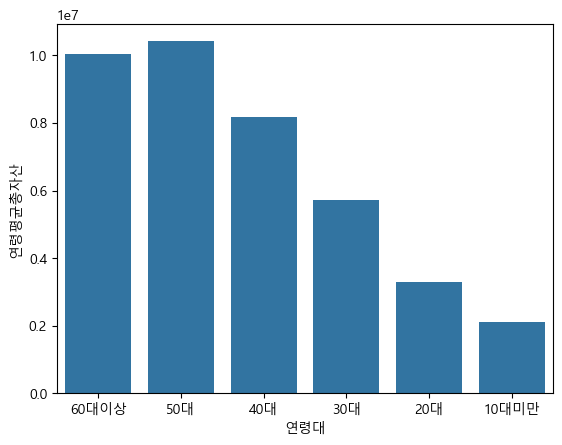

In [42]:
sns.barplot(df_m, x = '연령대', y ='연령평균총자산') # Bar 자산비율
# plt.xlim(0,20000)
# plt.ylim(0, 25000000)
plt.show()